In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [2]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.88045373 0.22201207 0.12217075 0.0985555  0.07914199]


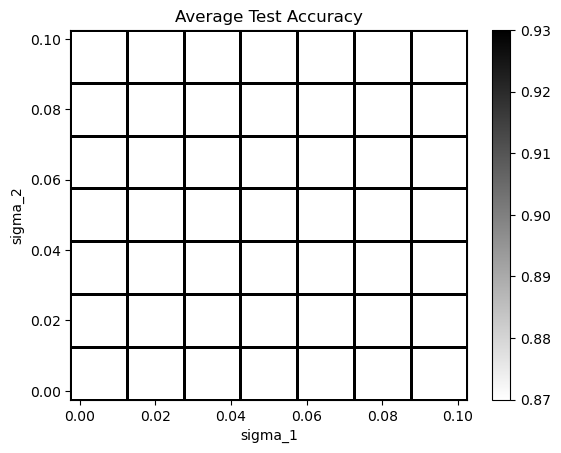

In [3]:
zeros = np.zeros((7,7))
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, zeros, cmap = 'gist_yarg', edgecolors='k', vmin=0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("zeros.png")

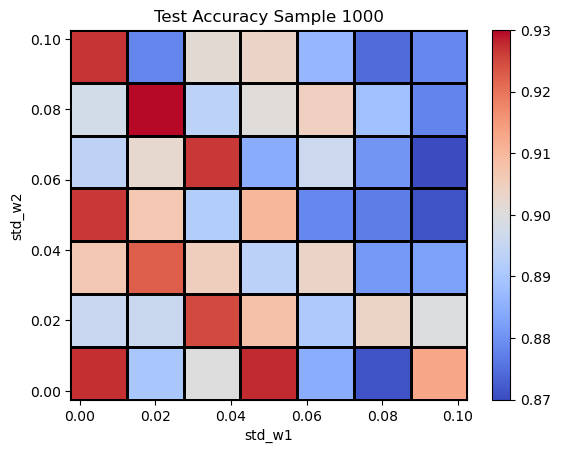

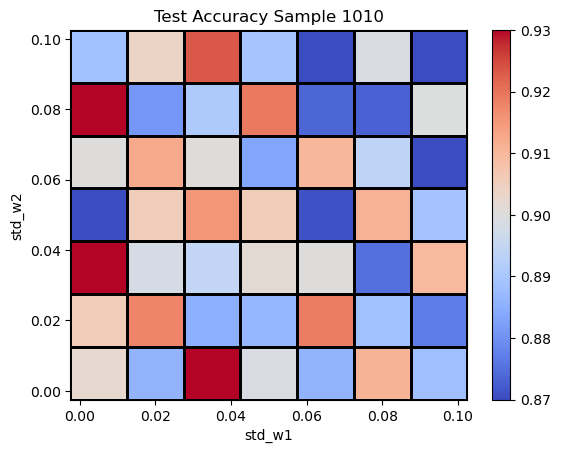

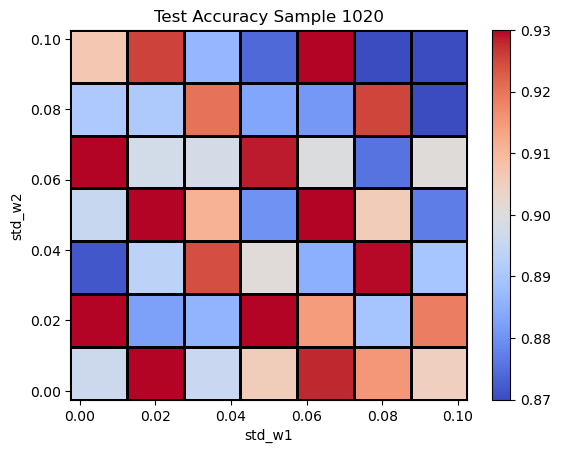

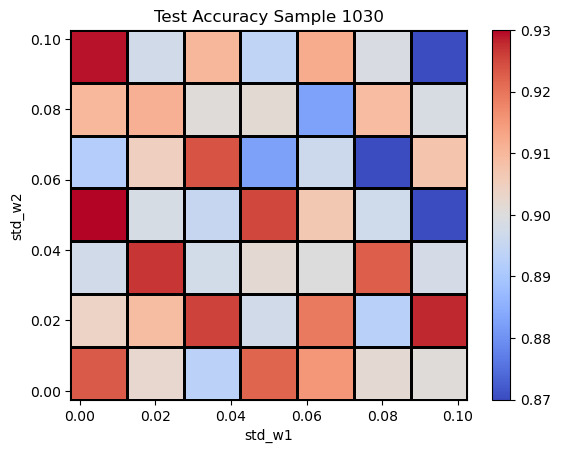

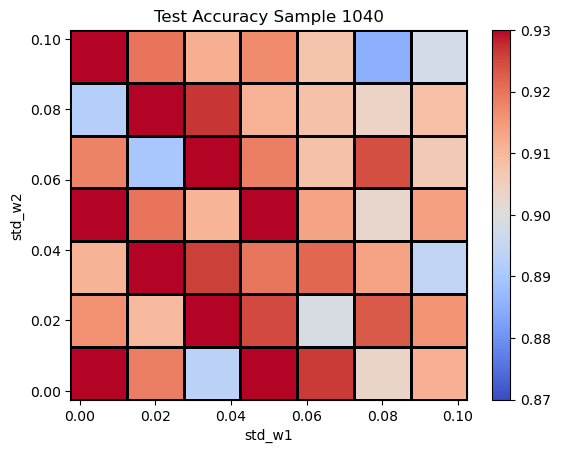

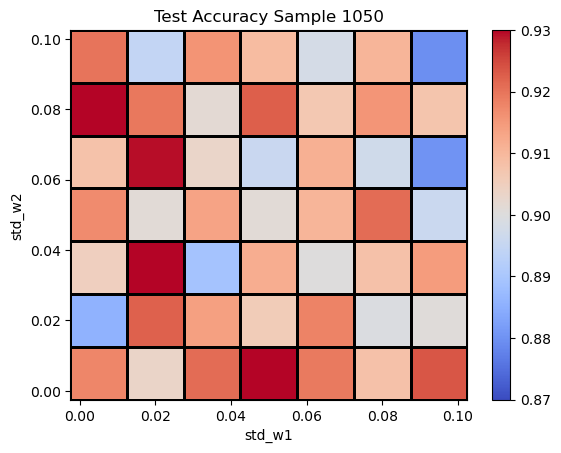

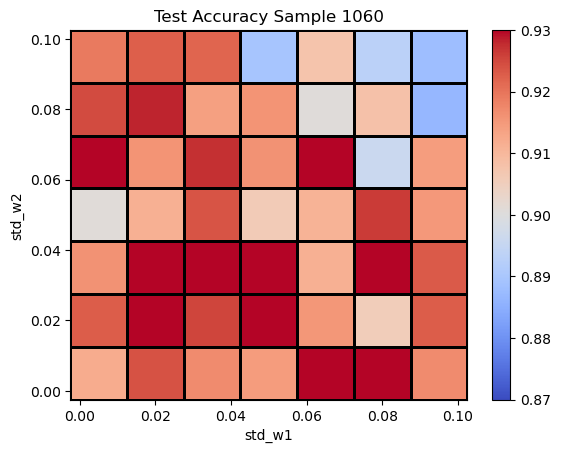

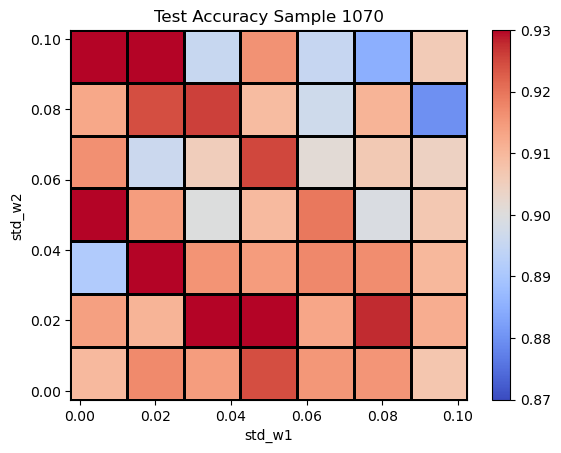

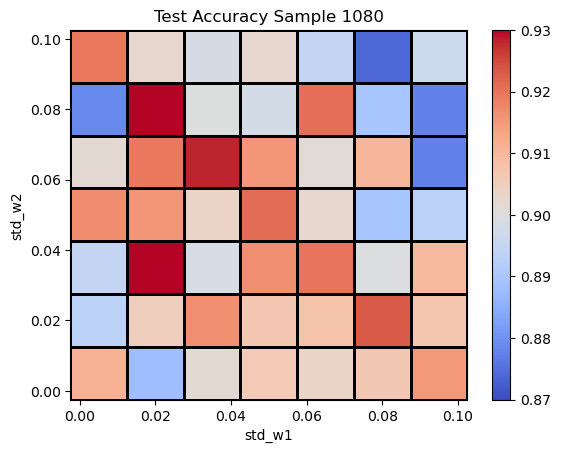

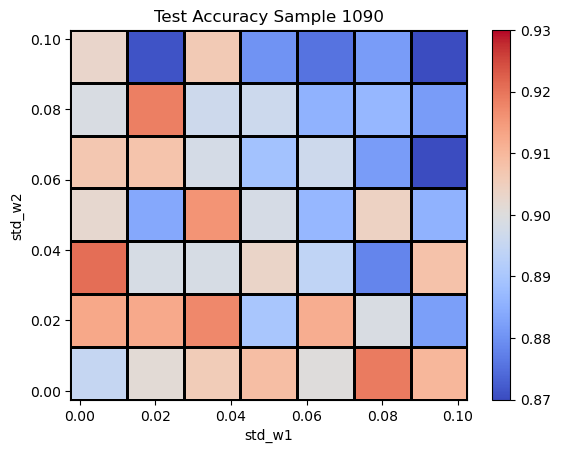

In [4]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93, edgecolors='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]




In [5]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [6]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [7]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.91323117, 0.90861378, 0.90517829, 0.91324119, 0.91116787,
        0.90828325, 0.91816907],
       [0.90753205, 0.9098758 , 0.92033253, 0.90876402, 0.907502  ,
        0.91777845, 0.90503806],
       [0.90751202, 0.91633614, 0.90836338, 0.90804287, 0.9141226 ,
        0.90694111, 0.90710136],
       [0.91784856, 0.91208934, 0.90929487, 0.90877404, 0.90388622,
        0.90576923, 0.89754607],
       [0.91085737, 0.91085737, 0.90536859, 0.90310497, 0.90547877,
        0.89604367, 0.89679487],
       [0.90826322, 0.90520833, 0.90588942, 0.90340545, 0.89328926,
        0.90103165, 0.88631811],
       [0.90909455, 0.90638021, 0.90385617, 0.8909355 , 0.88895232,
        0.88820112, 0.8778145 ]])

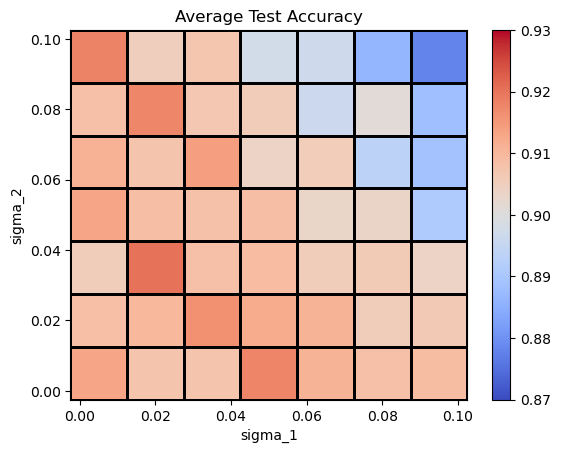

In [8]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_200_0.1.png".format(sample))

0.9203325320512821
0.8778145032051283


Text(0.5, 1.0, 'Average Test Accuracy')

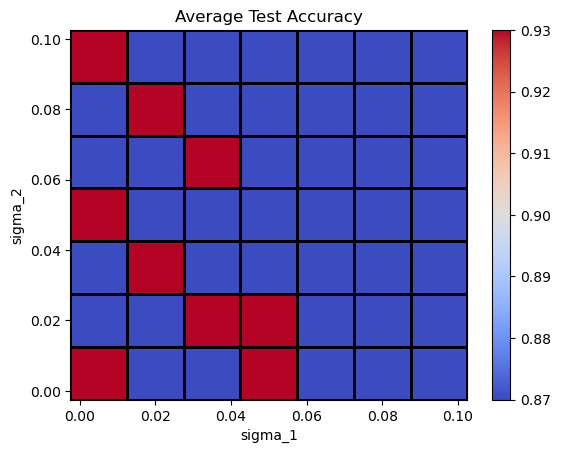

In [20]:
print(np.max(average_test_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_test_accuracy_grid_10_by_10_10_samples)
print(np.min(average_test_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_test_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.8
result_filter=average_test_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


In [10]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.99*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[ True, False, False,  True,  True, False,  True],
       [False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False],
       [ True,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [11]:
test1 = average_test_accuracy_grid_10_by_10_10_samples >= 0.99*np.max(average_test_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_test_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_test_accuracy_grid_10_by_10_10_samples>.91116787)

print(test2)

[0.91116787 0.91208934 0.91323117 0.91324119 0.9141226  0.91633614
 0.91777845 0.91784856 0.91816907 0.92033253]


In [12]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.015+0.005
    array.append(tbw1_w2)

In [13]:
max_accuracy = np.max( average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax( average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005


In [14]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 200
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_200_seed_{}.npz".format(i),**data)
    i+=1

In [15]:
data = {}
data['frequency'] = 65
data['N'] = 200
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_200",**data)